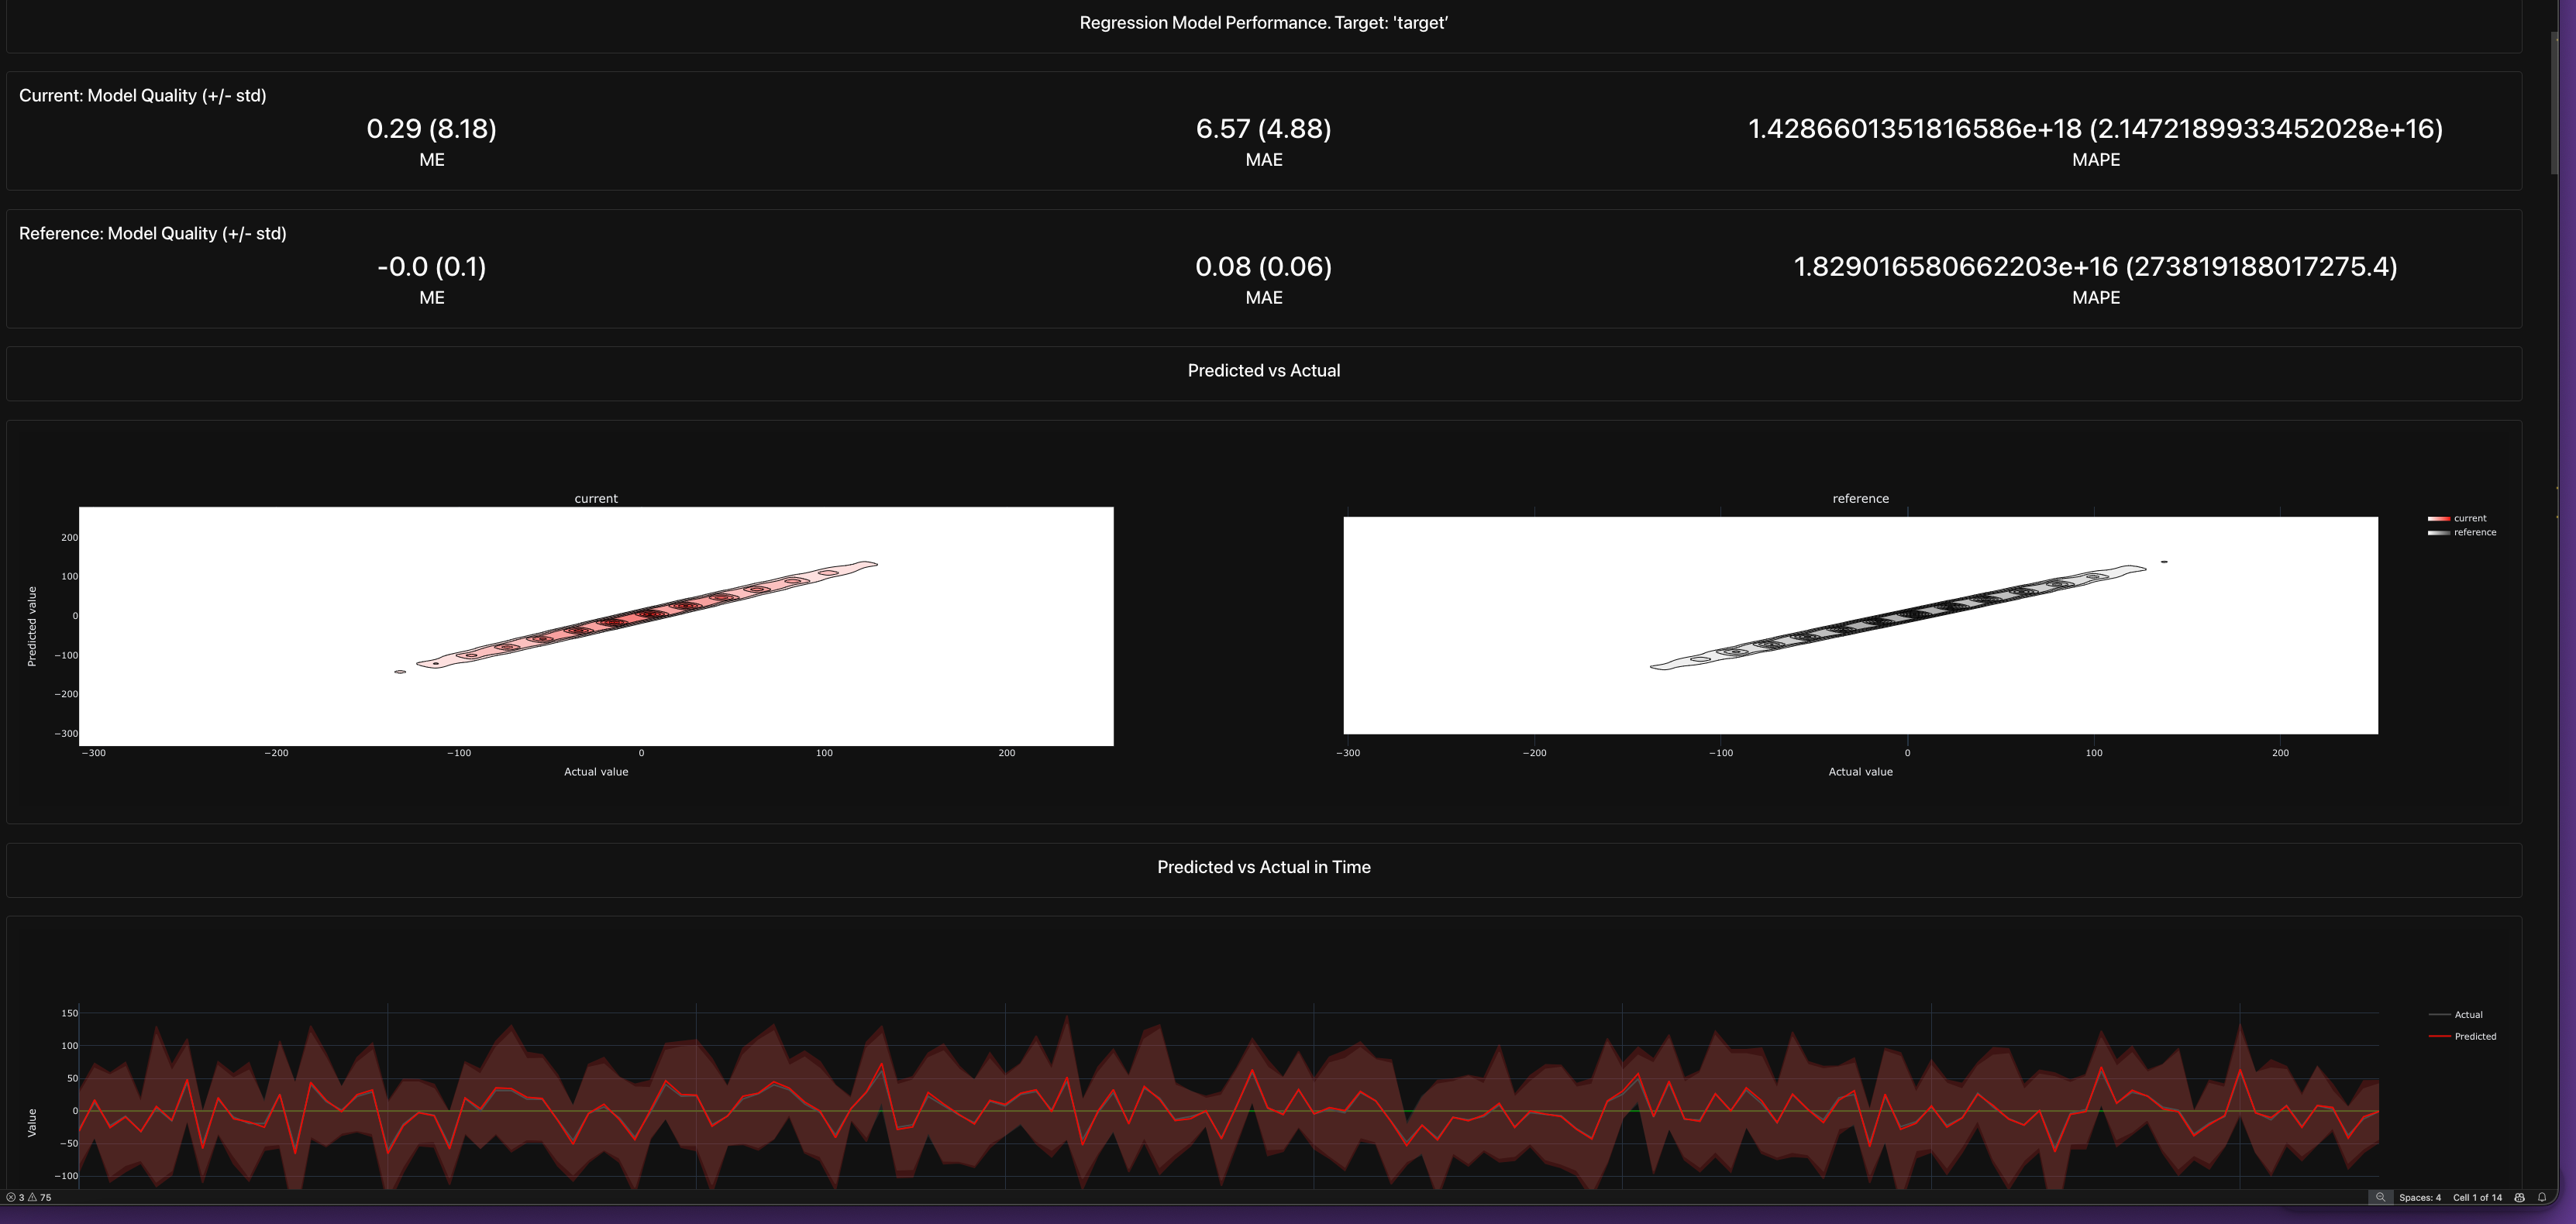

In [ ]:

import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

# Run the installation commands
!pip install evidently

# Clean up the notebook
clean_notebook()

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from evidently.report import Report
from evidently.metric_preset import RegressionPreset
from evidently.pipeline.column_mapping import ColumnMapping

In [2]:
# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)

# Convert to DataFrame
feature_names = [f"feature_{i}" for i in range(1, 6)]
reference_data = pd.DataFrame(X, columns=feature_names)
reference_data['target'] = y

# Simulate "current" data with drift
current_data = reference_data.copy()
current_data[feature_names] = current_data[feature_names] * 1.1  # 10% drift in features
current_data['target'] = current_data['target'] + np.random.normal(0, 5, size=len(current_data))  # Noise in target


In [3]:

# Preview datasets
print("Reference Data Sample:")
reference_data.head()


Reference Data Sample:


feature_1  feature_2  feature_3  feature_4  feature_5     target
0   2.056544   0.606851   0.482688  -1.130888   0.420094  74.905613
1  -0.799192  -0.645964  -0.182896  -0.482744   1.374876 -41.649588
2   1.076007  -0.796026  -0.751969   0.021312  -0.319054 -24.182866
3  -0.103255  -0.828497   1.489863  -1.643189  -1.600904 -87.094505
4  -2.063403   0.503252  -0.645572  -0.317350  -1.661083 -86.122029

In [4]:
print("\nCurrent Data Sample:")
current_data.head()


Current Data Sample:


feature_1  feature_2  feature_3  feature_4  feature_5     target
0   2.262198   0.667536   0.530957  -1.243977   0.462104  65.420315
1  -0.879111  -0.710561  -0.201186  -0.531018   1.512364 -43.313425
2   1.183608  -0.875628  -0.827166   0.023443  -0.350959 -16.404569
3  -0.113580  -0.911347   1.638850  -1.807508  -1.760994 -79.716868
4  -2.269743   0.553577  -0.710129  -0.349086  -1.827192 -89.585206

In [5]:
# Split reference data into train and test
X_train, X_test, y_train, y_test = train_test_split(reference_data[feature_names], 
                                                    reference_data['target'], 
                                                    test_size=0.2, 
                                                    random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions
reference_data['prediction'] = model.predict(reference_data[feature_names])
current_data['prediction'] = model.predict(current_data[feature_names])


In [6]:

# Preview data with predictions
print("\nReference Data with Predictions:")
reference_data.head()


Reference Data with Predictions:


feature_1  feature_2  feature_3  feature_4  feature_5     target  \
0   2.056544   0.606851   0.482688  -1.130888   0.420094  74.905613   
1  -0.799192  -0.645964  -0.182896  -0.482744   1.374876 -41.649588   
2   1.076007  -0.796026  -0.751969   0.021312  -0.319054 -24.182866   
3  -0.103255  -0.828497   1.489863  -1.643189  -1.600904 -87.094505   
4  -2.063403   0.503252  -0.645572  -0.317350  -1.661083 -86.122029   

   prediction  
0   74.927260  
1  -41.545369  
2  -24.065805  
3  -87.136670  
4  -86.143396

In [7]:

print("\nCurrent Data with Predictions:")
current_data.head()


Current Data with Predictions:


feature_1  feature_2  feature_3  feature_4  feature_5     target  \
0   2.262198   0.667536   0.530957  -1.243977   0.462104  65.420315   
1  -0.879111  -0.710561  -0.201186  -0.531018   1.512364 -43.313425   
2   1.183608  -0.875628  -0.827166   0.023443  -0.350959 -16.404569   
3  -0.113580  -0.911347   1.638850  -1.807508  -1.760994 -79.716868   
4  -2.269743   0.553577  -0.710129  -0.349086  -1.827192 -89.585206   

   prediction  
0   82.420659  
1  -45.699232  
2  -26.471711  
3  -95.849664  
4  -94.757063

In [8]:
# Define column mapping
column_mapping = ColumnMapping()
column_mapping.target = 'target'
column_mapping.prediction = 'prediction'
column_mapping.numerical_features = feature_names

In [9]:
# Create a regression performance report
regression_report = Report(metrics=[RegressionPreset()])

# Run the report
regression_report.run(reference_data=reference_data, 
                      current_data=current_data, 
                      column_mapping=column_mapping)


# Save as HTML (optional)
regression_report.save_html("regression_performance_report.html")



# Display the report
#regression_report.show()




In [11]:

from IPython.display import display, HTML

# Read and display the HTML content
with open("regression_performance_report.html", 'r', encoding='utf-8') as f:
    html_content = f.read()
display(HTML(html_content))

In [ ]:
from evidently.metric_preset import DataDriftPreset

# Create a combined report with regression performance and data drift
combined_report = Report(metrics=[RegressionPreset(), DataDriftPreset()])

# Run the report
combined_report.run(reference_data=reference_data, 
                    current_data=current_data, 
                    column_mapping=column_mapping)

# Save as HTML (optional)
combined_report.save_html("combined_report.html")


# Display the report
#combined_report.show()

In [12]:

from IPython.display import display, HTML

# Read and display the HTML content
with open("combined_report.html", 'r', encoding='utf-8') as f:
    html_content = f.read()
display(HTML(html_content))
